In [1]:
import numpy as np
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [3]:
#labels
folder = ["business", "entertainment", "politics", "sport", "tech"]

In [4]:
#loading data
data=[]
label=[]
for s in folder:
    for i in range(1,410):
        path="D:\\project\\project\\data\\" + s + "\\" + str(i).zfill(3) + ".txt"
        try:
            f=open(path)
            data.append(f.read())
            label.append(folder.index(s))
        except:
            continue            

In [5]:
#before cleaning
print(data[0])

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AO

In [6]:
# Data Cleaning Steps:
# 1. separate words and special characters by inserting spaces between them
# 2. removing punctuation marks like '.', ',', '?', etc.
# 3. removing stopwords (is, the, etc.)
# 4. determing root word of each word

In [7]:

rep = re.compile("(\.)|(\\\n)|(\,)|(\?)|(\\\'s)|(\")|(\')|(\()|(\))|(\\\)|(\-)")

In [8]:

stop_words = set(stopwords.words('english'))
ps=PorterStemmer()
for i in range(len(data)):
    para=data[i]
    para=para.lower()
    para=rep.sub(" ", para)
    para=para.replace('$', " $ ")
    para=para.replace('%', " % ")
    para=re.sub('\s\s+', " ", para)
    words=para.split(' ')
    
    for j in range(len(words)):
        if words[j] in stop_words:
            words[j]=""
        else:
            words[j]=ps.stem(words[j])        
    
    data[i]=' '.join(x for x in words)

In [9]:
#after cleaning
print(data[0])

ad sale boost time warner profit quarterli profit  us media giant timewarn jump 76 %  $ 1 13bn â£600m   three month  decemb  $ 639m year earlier  firm    one   biggest investor  googl benefit  sale  high speed internet connect  higher advert sale timewarn said fourth quarter sale rose 2 %  $ 11 1bn  $ 10 9bn  profit  buoy  one  gain  offset  profit dip  warner bro  less user  aol time warner said  friday    own 8 %  search engin googl    internet busi aol   mix fortun  lost 464 000 subscrib   fourth quarter profit  lower    preced three quarter howev  compani said aol underli profit  except item rose 8 %   back  stronger internet advertis revenu  hope  increas subscrib  offer  onlin servic free  timewarn internet custom   tri  sign  aol exist custom  high speed broadband timewarn also   restat 2000  2003 result follow  probe   us secur exchang commiss sec   close  conclud time warner fourth quarter profit  slightli better  analyst expect   film divis saw profit slump 27 %  $ 284m help 

In [16]:
def data_process(gram_n, clf):
  
    def get_grams():
        grams=list()
        for i in range(len(words)-gram_n-1):
            s=""
            for j in range(gram_n):
                s=s+" "+words[i+j]
            grams.append(s)
        return grams

    
    
    # generate grams and vocabulary
    
    vocab=dict()
    vocab["START"]=0
    vocab["END"]=1
    vocab["PAD"]=2
    count=3
    for doc in data:
        words=doc.split()
        grams=get_grams()
        for seq in grams:
            if seq not in vocab:
                vocab[seq]=count
                count+=1
    yield len(vocab)

    
    # assign id to each word/gram
    doc2id=list()
    doc_len=dict()
    for doc in data:
        f=[vocab["START"]]
        words=doc.split()
        grams=get_grams()
        for seq in grams:
            f.append(vocab[seq])
        f.append(vocab["END"])
        if len(f) in doc_len:
            doc_len[len(f)]+=1
        else:
            doc_len[len(f)]=1
        doc2id.append(f)
        
    doc_len=dict(sorted(doc_len.items(), key=lambda x:x[0]))
    
    # determine the popular length which constitute length of 90% of documents
    f=0
    for k, v in doc_len.items():
        doc_len[k]+=f
        f=doc_len[k]
    for k, v in doc_len.items():
        doc_len[k]=v/f*100
    
    max_len=0
    for key, value in doc_len.items():
        if value>90:
            max_len=key
            break
        else:
            pass
        
    yield doc_len
    yield max_len
    
    # truncate each doc to the determined max_len
    for doc in doc2id:
        for i in range(len(doc), max_len):
            doc.append(vocab["PAD"])
        del doc[max_len:]
    
    
    # treat them as features
    features = np.array(doc2id)
    labels=np.array(label)
    
    # split the data into train and test for 80:20 ratio
    features_train, features_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, random_state=0)
    
    #train the classifier
    clf.fit(features_train, label_train)
    
    # prediction on test
    pred = clf.predict(features_test)
    
    
    # get the accuracy score
    yield accuracy_score(label_test, pred)
    
    

In [17]:
#Naive Bayes
gram_cnt = []
accuracy = []
time_req=[]
NB = GaussianNB()
for i in range(1, 20):
    t=time.process_time()
    vocab_len, doc_len, max_len, acc_score = data_process(i, NB)
    et=time.process_time()-t
    gram_cnt.append(i)
    accuracy.append(acc_score*100)
    time_req.append(et)
    print(i, acc_score*100,et)

1 46.40198511166253 1.671875
2 81.38957816377172 2.484375
3 90.81885856079404 3.09375
4 91.06699751861042 2.96875
5 91.06699751861042 3.3125
6 91.3151364764268 3.09375
7 91.06699751861042 3.078125
8 91.06699751861042 3.234375
9 91.06699751861042 3.71875
10 91.06699751861042 4.0
11 90.81885856079404 4.203125
12 90.81885856079404 4.421875
13 90.81885856079404 4.59375
14 90.81885856079404 4.90625
15 90.81885856079404 5.21875
16 90.81885856079404 5.265625
17 90.81885856079404 5.578125
18 90.81885856079404 5.921875
19 90.57071960297766 6.09375


(0, 20)

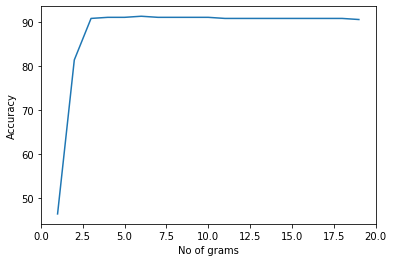

In [12]:


plt.plot(gram_cnt, accuracy, label='Accuracy')
plt.xlabel("No of grams")
plt.ylabel("Accuracy")
plt.xlim(0,20)

(0, 20)

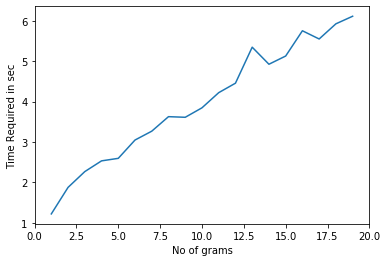

In [13]:
plt.plot(gram_cnt, time_req, label='Time Required')
plt.xlabel("No of grams")
plt.ylabel("Time Required in sec")
plt.xlim(0,20)

In [ ]:
# Conclusions
# Accuracy increases and then decreases as we increase number of grams
# Time required increase with number of grams
# Best accuracy is obtained for 6-Grams